# 경사하강법
- 기울기값을 기준으로 최적화하기위한 방향을 결정한다.

In [1]:
# 미분의 구현. 나쁜 버전. (수치미분법)
import numpy as np
def numerical_diff(f, x):  # 수치 미분
  h = 10e-50  # 매우 작은 수

  return (f(x+h) - f(x)) / h

In [2]:
print(np.float32(10e-50))
# 문제점 발생.
# h가 너무 작은 값이라서 컴퓨터에서는 그냥 0으로 출력해버린다.

0.0


In [3]:
# 수학적으로 이 미세한 값 h를 1e-4정도로 놓으면 좋은 값을 얻는다고 알려져있다.
# h를 1e-4로 놓고 다시 수치미분법 식을 구현해보면
def numerical_diff(f, x):
  h = 1e-4
  
  return (f(x+h) - f(x)) / h  # 전방 차분이라고 한다.

In [4]:
# 미분에서 h가 0에 가까워질 때의 순간 기울기를 구하는 것이지 실제로는 0이 되지는 않는다.
# 따라서 컴퓨터로 계산을 할 때는 일부러 오차를 주어야 한다.

In [5]:
# x+h, x-h일 때의 함수f의 차분을 계산
# x를 중심으로 그 전후의 차분을 계산하므로
# 중심차분, 중앙 차분이라고 한다.
def numerical_diff(f, x):
  h = 1e-4
  
  return (f(x+h) - f(x-h)) / 2*h

In [6]:
# 이렇게 아주 작은 차분으로 미분하는 것을 수치미분이라고 한다.

$y = 0.01x^2 + 0.1x$

In [7]:
def function_1(x):
  return 0.01 * x**2 + 0.1 *x

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

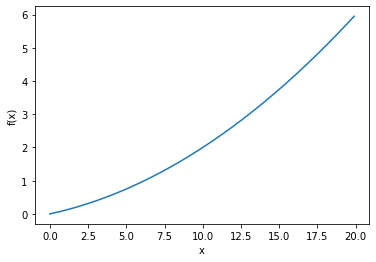

In [10]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [11]:
# 함수를 그렸으니 이제 미분을 해보자.

In [12]:
# x=5일때의 미분값
print(numerical_diff(function_1, 5))
# x=10일때의 미분값
print(numerical_diff(function_1, 10))

1.9999999999908982e-09
2.999999999986347e-09


In [13]:
# 이 미분값이 직선의 기울기 이니까 위의 그림에 접선의 기울기까지 같이 그려보자.

In [14]:
# 접선을 함수로 만들자.
def tangent_line(f, x):
  d = numerical_diff(f, x)  # 함수 f의 x에서의 기울기
  y_zul = f(x) - d*x  # 함수 f의 y절편
  return lambda t: d*t + y_zul
  # t에 대한 접선의 기울기

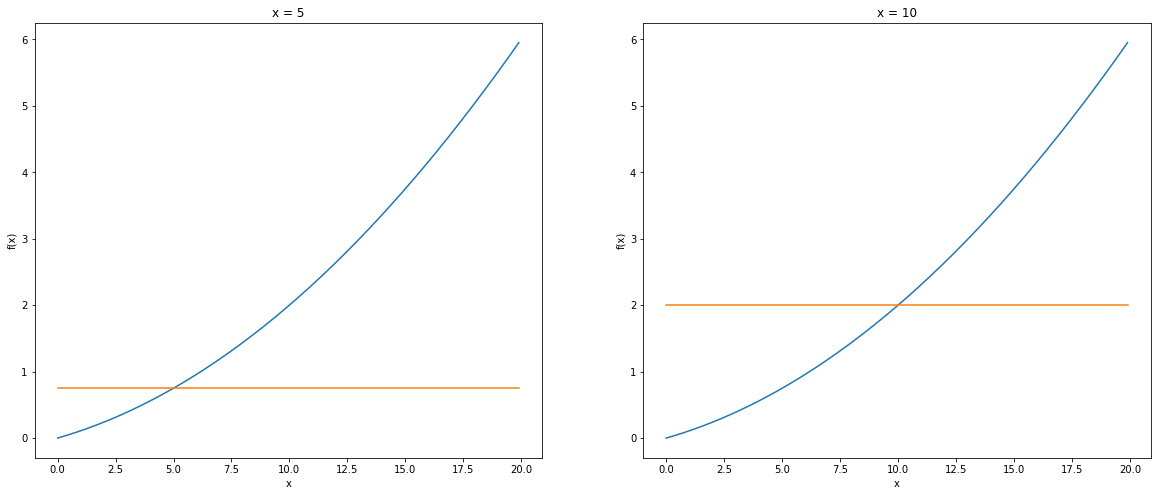

In [15]:
# x=5, x=10일 때의 접선의 기울기를 추가로 그린 그림을
# 나란히 그려보자.
fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

$f(x_0, x_1) = x^2_0 + x^2_1$

In [16]:
# 인수가 2개 이상일 때는 편미분.

In [17]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

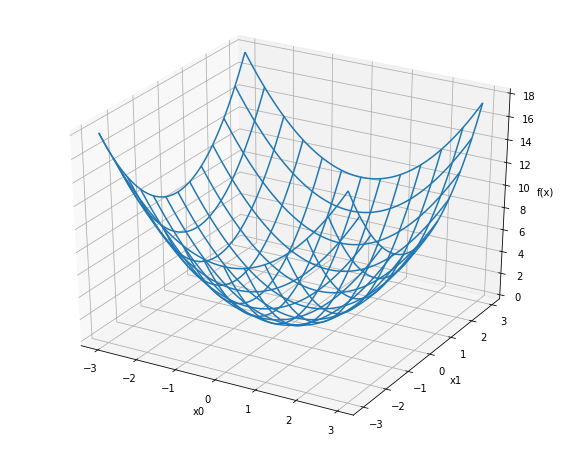

In [18]:
# 이 함수를 그래프로 그려보자.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0, X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z, rstride=10, cstride=10)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x)")

plt.show()

In [19]:
# 편미분이란 건
# 기준 변수 1개만 고려하고 나머지는 싹 다 무시한다.

# 편미분 연습 문제 풀어보자.

In [20]:
# x0=3, x1=4일 때
# x0에 대한 편미분
def function_tmp0(x0):
  return x0*x0 + 4.0*4.0
print(numerical_diff(function_tmp0, 3.0))
# 처음 함수 자체에 편미분을 할 대상이 아닌 변수들은 대입시키고
# 미분을 한 다음 값을 대입한다.

6.000000000003781e-08


In [21]:
# 이번에는
# x0=3, x1=4인 것은 동일한데
# x1에 대한 편미분
def function_tmp1(x1):
  return 3.0*3.0 + x1*x1
print(numerical_diff(function_tmp1, 4.0))

7.999999999999119e-08


In [22]:
# 편미분 역시 변수가 하나인 미분과 마찬가지로 특정 시점의 기울기를 구할 수 있다.
# 단, 여러 변수 중 목표 변수 1개에만 초점을 맞추고 다른 변수들은 상수처럼 생각한다.(고정시킴)

## 기울기
- $(\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1})$ 처럼 모든 변수의 편미분을 벡터로 정리한 것

In [23]:
# 기울기 함수를 구현해보자.
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  # x와 shape가 같은 0으로 채워진 배열을 우선 만들어 놓는다.
  # 이유? 나중에 각각의 변수들로 편미분한 값들을 index 순서대로 채워넣기 위해

  # 각각의 변수들에 대한 편미분값을 구하자.
  for x_index in range(x.size):
    # size : 전체 원소의 갯수 반환
    x_plus_h = x[x_index] + h
    x_minus_h = x[x_index] - h
    
    # f(x+h), f(x-h) 계산
    fx_plus_h = f(x_plus_h)
    fx_minus_h = f(x_minus_h)

    # 이제 기울기를 구한다.
    # 위의 0으로 가득찬 grad 에 인덱스에 맞게 채워준다.
    grad[x_index] = (fx_plus_h - fx_minus_h) / 2*h
    
  return grad